In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

---
# Mouse
### Zeisel_2018

/home/weil/software/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,age,cell_ontology_class,cell_ontology_id,cell_type1,cellid,dataset_name,donor,organ,organism,platform,region,strain
1,"p21, p23",enteric neuron,CL:0007011,Enteric neurons,10X82_2_TCTCTCACCAGTTA-,Zeisel_2018,nan,Nervous System,Mus musculus,10x,Enteric nervous system,Wnt1Cre-R26Rtomato-C57BL/6J
2,"p21, p23",enteric neuron,CL:0007011,Enteric neurons,10X82_2_TATTATCTACCAGA-,Zeisel_2018,nan,Nervous System,Mus musculus,10x,Enteric nervous system,Wnt1Cre-R26Rtomato-C57BL/6J
3,"p21, p23",enteric neuron,CL:0007011,Enteric neurons,10X82_2_TATCCCAGATGGCA-,Zeisel_2018,nan,Nervous System,Mus musculus,10x,Enteric nervous system,Wnt1Cre-R26Rtomato-C57BL/6J
4,"p21, p23",enteric neuron,CL:0007011,Enteric neurons,10X82_2_ATTACGTATGAATG-,Zeisel_2018,nan,Nervous System,Mus musculus,10x,Enteric nervous system,Wnt1Cre-R26Rtomato-C57BL/6J
5,"p21, p23",enteric neuron,CL:0007011,Enteric neurons,10X82_2_ATACGTCAATAAGG-,Zeisel_2018,nan,Nervous System,Mus musculus,10x,Enteric nervous system,Wnt1Cre-R26Rtomato-C57BL/6J


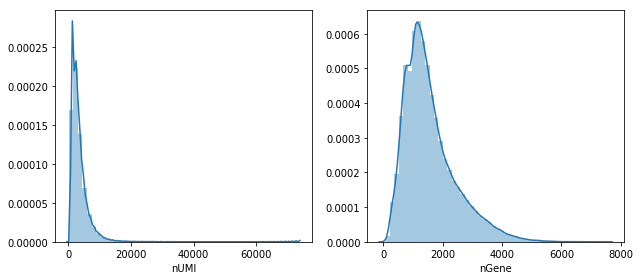

In [2]:
zeisel_2018 = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Zeisel_2018/data.h5")
utils.peek(zeisel_2018, "Zeisel_2018")
zeisel_2018 = zeisel_2018.normalize()
zeisel_2018.obs.head()

In [3]:
#opt_model_kwargs = dict(batch_effect="donor")
zeisel_2018_model = cb.directi.fit_DIRECTi(
    zeisel_2018, zeisel_2018.uns["seurat_genes"],
    **fixed_model_kwargs, #**opt_model_kwargs,
    path="/tmp/cb/db/Zeisel_2018/model_0"
)
zeisel_2018.latent = zeisel_2018_model.inference(zeisel_2018)

[DIRECTi epoch 0] train=0.791, val=0.566, time elapsed=14.3s Best save...
[DIRECTi epoch 1] train=0.557, val=0.548, time elapsed=13.5s Best save...
[DIRECTi epoch 2] train=0.543, val=0.538, time elapsed=13.7s Best save...
[DIRECTi epoch 3] train=0.537, val=0.534, time elapsed=13.9s Best save...
[DIRECTi epoch 4] train=0.534, val=0.532, time elapsed=14.2s Best save...
[DIRECTi epoch 5] train=0.532, val=0.530, time elapsed=14.5s Best save...
[DIRECTi epoch 6] train=0.531, val=0.529, time elapsed=14.2s Best save...
[DIRECTi epoch 7] train=0.530, val=0.528, time elapsed=14.0s Best save...
[DIRECTi epoch 8] train=0.529, val=0.529, time elapsed=14.0s
[DIRECTi epoch 9] train=0.528, val=0.528, time elapsed=14.0s Best save...
[DIRECTi epoch 10] train=0.528, val=0.528, time elapsed=13.6s Best save...
[DIRECTi epoch 11] train=0.528, val=0.527, time elapsed=13.6s Best save...
[DIRECTi epoch 12] train=0.527, val=0.527, time elapsed=13.4s Best save...
[DIRECTi epoch 13] train=0.527, val=0.526, time 

[  Info   ] Computing tSNE...


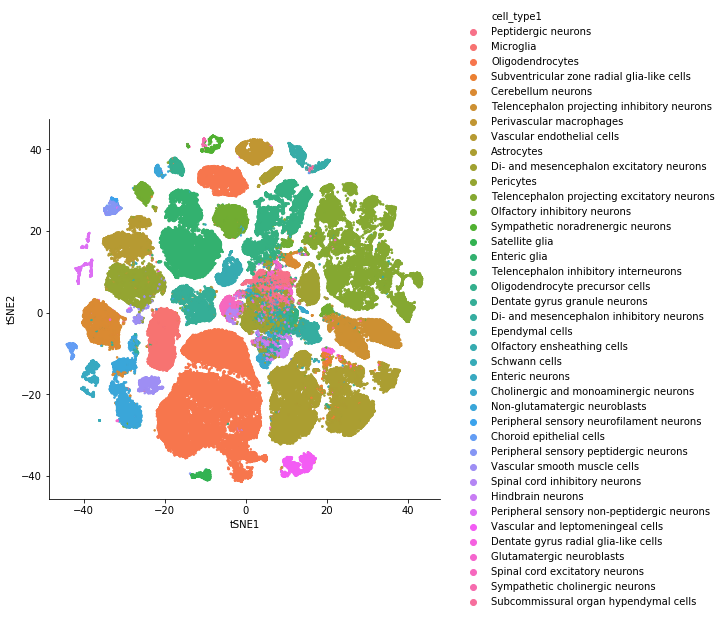

In [4]:
plot = zeisel_2018.visualize_latent("cell_type1")
plot.get_figure().savefig("Zeisel_2018/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


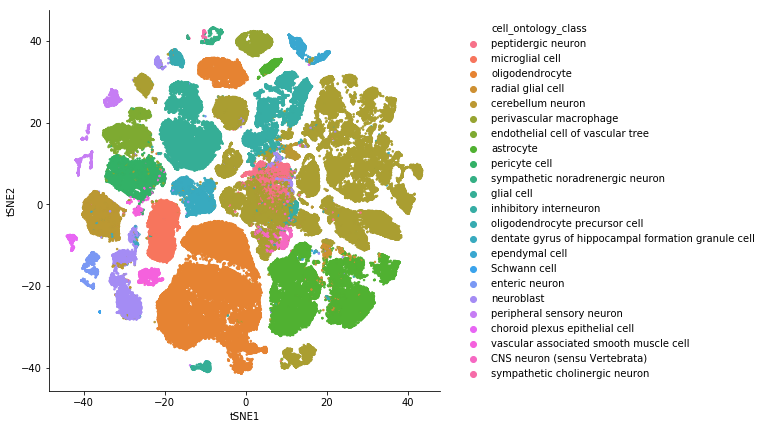

In [5]:
plot = zeisel_2018.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Zeisel_2018/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


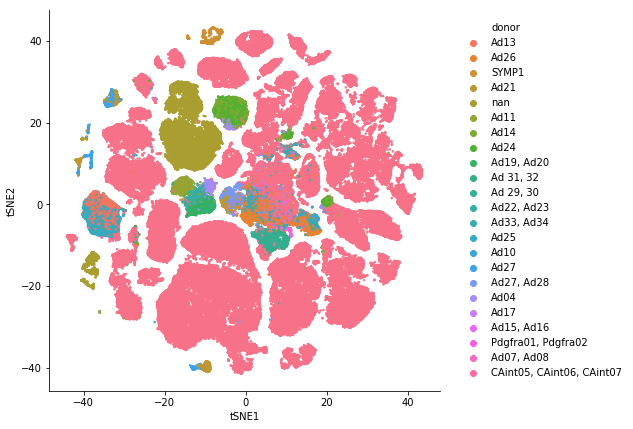

In [6]:
plot = zeisel_2018.visualize_latent("donor")
plot.get_figure().savefig("Zeisel_2018/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


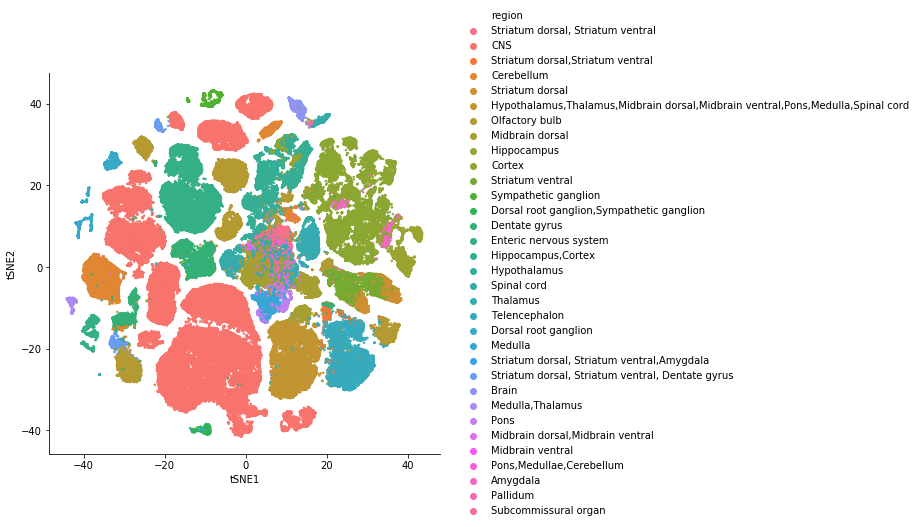

In [7]:
plot = zeisel_2018.visualize_latent("region")
plot.get_figure().savefig("Zeisel_2018/region.pdf", bbox_inches="tight")

In [8]:
%%capture capio
zeisel_2018_models = [zeisel_2018_model]
opt_model_kwargs = dict(batch_effect="donor")
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    zeisel_2018_models.append(cb.directi.fit_DIRECTi(
        zeisel_2018, zeisel_2018.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Zeisel_2018/model_%d" % i
    ))
zeisel_2018_blast = cb.blast.BLAST(zeisel_2018_models, zeisel_2018, 
                                               keep_exprs=True).build_empirical()
zeisel_2018_blast.save("Zeisel_2018")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Zeisel_2018/model_1/checkpoint-138
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Zeisel_2018/model_2/checkpoint-120
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Zeisel_2018/model_3/checkpoint-198


In [9]:
with open("Zeisel_2018/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Zeisel_2018/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [10]:
utils.self_projection(zeisel_2018_blast, "Zeisel_2018")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/weil/software/conda/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.8878
Accuracy = 0.9637
